In [70]:
%matplotlib inline
import pandas as pd
import scipy.stats as st
import math
import matplotlib.pyplot as plt
import numpy as np

In [71]:
data = pd.read_csv("./haberman-data/haberman.csv")
n = len(data)

## Look at the data types

In [72]:
print "Column\tType"
for col in data:
    print col + "\t" + str(data[col].dtypes)

Column	Type
age	int64
year	int64
axillary_nodes	int64
survival_status	int64


### Look at the summary statistics for the data

In [73]:
data.describe()

,age,year,axillary_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


## Convert survival_status to a categorical variable

Status 1: the patient survived 5 years or longer

Status 2: the patient died within 5 years


In [36]:
data["survival_status"] = data["survival_status"].astype('category')

### Graph the survival status

1. 225 people in the sample survived 5 years or longer
2. 81 people died within 5 years

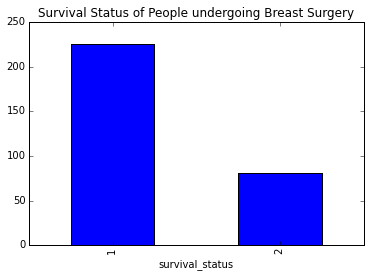

In [74]:
data.groupby('survival_status').size().plot(kind='bar', title='Survival Status of People undergoing Breast Surgery')
# data.survival_status.value_counts().plot(kind='bar')

In [48]:
def t_confidence_interval(alpha, n, x_bar, s):
    t_critical = st.t.ppf(1-alpha/2,  n - 1 )
    std_error_mean = t_critical * s/math.sqrt(n)
    return map(lambda x: round(x,2), [x_bar - std_error_mean, x_bar + std_error_mean])

In [49]:
# We want a 95% confidence interval
alpha = 0.05

### What is the mean age of the population of people who have undergone breast surgery?

In [50]:
# 95% confidence interval for the mean population age
t_confidence_interval(alpha, n, data["age"].mean(), data["age"].std())

[51.24, 53.67]

### Distribution of Age

The age seems to be normally distributed between [30, 83]

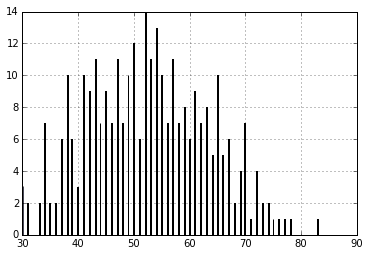

In [75]:
data["age"].hist(bins=306)

### What is the mean number of axillary nodes in the population of people who have undergone breast surgery?

In [9]:
# 95% population interval for the mean number of axillary nodes
t_confidence_interval(alpha, n, data["axillary_nodes"].mean(), data["axillary_nodes"].std())

[3.22, 4.83]

### Distribution of the number of axillary nodes

The distribution is positively skewed

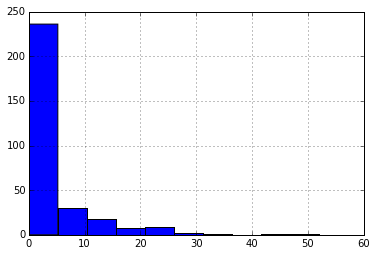

In [68]:
data["axillary_nodes"].hist()

### Is there a relationship between number of axillary nodes and age?

1. There doesn't seem to be a relationship
2. Correlation Coefficient: -0.06
3. p-value is 0.27 which is not statistically significant

/Users/ddigges/miniconda2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


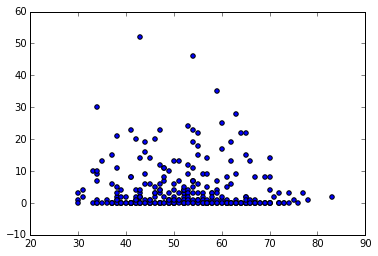

In [77]:
plt.scatter(data["age"], data["axillary_nodes"])

In [83]:
from scipy.stats.stats import pearsonr
pearsonr(data["age"], data["axillary_nodes"])

(-0.063176102389800648, 0.27058847128546198)

### Is there a relationship between age and survival status?

In [84]:
# May need to perform a chi-square test for this